**Librerias**

In [185]:
import pandas as pd

**Carga de datos**

In [186]:
ruta_archivo = '/content/db_salud_ini.xlsx'
datos = pd.read_excel(ruta_archivo)

**Filas que los elementos contienen NA o "*"**

In [187]:
datdimension_inicial = datos.shape
filas_con_na = datos[datos.isna().any(axis=1)]
filas_con_asterisco = datos[datos.apply(lambda x: any('*' in str(val) for val in x), axis=1)]

# Imprimir las filas con valores NaN (NA)
print("As linhas com NA são:")
for indice_fila in filas_con_na.index:
    print(f"- {indice_fila}")

# Imprimir las filas con asteriscos (*)
print("As linhas com asteriscos (*) são:")
for indice_fila in filas_con_asterisco.index:
    print(f"- {indice_fila}")

As linhas com NA são:
- 51
- 97
- 168
- 201
- 241
As linhas com asteriscos (*) são:
- 6
- 76


**Eliminar filas no validas**

In [188]:
# Combinar índices de filas a eliminar
filas_a_eliminar = filas_con_na.index.union(filas_con_asterisco.index)

# Eliminar las filas del dataset
datos = datos.drop(filas_a_eliminar)

dimension_actualizada = datos.shape

# Calcular el porcentaje de alteración en la dimensión
porcentaje_alterado = (dimension_inicial[0] - dimension_actualizada[0]) / dimension_inicial[0] * 100

# Crear tabla de resumen
tabla_resumen = pd.DataFrame({'# Linhas': [dimension_inicial[0], dimension_actualizada[0]],
                              '# Colunas': [dimension_inicial[1], dimension_actualizada[1]],
                              '% Alterado': ['0%', f'{porcentaje_alterado:.2f}%']},
                             index=['Antes', 'Depois'])

# Imprimir tabla de resumen
print("Resumo das dimensões:")
print(tabla_resumen)

Resumo das dimensões:
        # Linhas  # Colunas % Alterado
Antes        253         25         0%
Depois       246         25      2.77%


**Seleccion de variables para realizar operaciones**

In [189]:
print(datos.dtypes)

patient_#                                     int64
age_group                                     int64
gender                                        int64
religion                                    float64
max_dg_sev_during_hospitalization             int64
max_dg_sev_categories                         int64
BMI                                           int64
date_d_test                          datetime64[ns]
month_d_examination                           int64
month_hosp_corona_dep                         int64
death_during_hospitalization                  int64
COPD                                          int64
CHF                                           int64
CIHD                                          int64
HTN                                           int64
CRF                                           int64
DM                                            int64
Hospitalization_length_days                   int64
pre-infection                               float64
pre-infectio

**EDA**

In [190]:
import plotly.graph_objects as go
import pandas as pd

age_labels = {1: '<50', 2: '50-64', 3: '>64'}
temp_df = datos[['age_group', 'gender']].copy()
temp_df['age_group'] = temp_df['age_group'].map(age_labels)

grouped_counts = temp_df.groupby(['age_group', 'gender']).size().reset_index(name='Count')

fig = go.Figure(data=[
    go.Bar(name='Masculino', x=grouped_counts[grouped_counts['gender'] == 0]['age_group'], y=grouped_counts[grouped_counts['gender'] == 0]['Count']),
    go.Bar(name='Femenino', x=grouped_counts[grouped_counts['gender'] == 1]['age_group'], y=grouped_counts[grouped_counts['gender'] == 1]['Count'])
])

fig.update_layout(
    title='Distribución de los pacientes por grupo de edad y género',
    xaxis=dict(title='Grupo de edad'),
    yaxis=dict(title='Cantidad'),
    barmode='group',
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='center', x=1)
)

fig.show()

In [191]:
import plotly.graph_objects as go
import pandas as pd

severity_labels = {0: 'Mild', 1: 'Moderate', 2: 'Severe', 3: 'Critical'}
temp_df = datos[['max_dg_sev_during_hospitalization']].copy()
severity_colors = {'Mild': '#00bfff', 'Moderate': '#ffa500', 'Severe': '#ff0000', 'Critical': '#633974'}
temp_df['max_dg_sev_during_hospitalization'] = temp_df['max_dg_sev_during_hospitalization'].map(severity_labels)

severity_counts = temp_df['max_dg_sev_during_hospitalization'].value_counts().reset_index().rename(columns={'index': 'Severity', 'max_dg_sev_during_hospitalization': 'Count'})

fig = go.Figure(data=[
    go.Bar(x=severity_counts['Severity'], y=severity_counts['Count'], marker_color=[severity_colors[severity] for severity in severity_counts['Severity']])
])

fig.update_layout(
    title='Gravedad máxima del diagnóstico durante la hospitalización',
    xaxis=dict(title='Gravedad'),
    yaxis=dict(title='Cantidad'),
)

fig.show()

In [192]:
import pandas as pd
import plotly.graph_objects as go

# Mapear las nuevas etiquetas a los valores existentes en la columna 'pre-infection_category'
pre_infection_labels = {1: '<=19.99', 2: '20-29.99', 3: '30-39.99', 4: '40+'}
temp_df = datos[['pre-infection_category', 'gender']].copy()
temp_df['pre-infection_category'] = temp_df['pre-infection_category'].map(pre_infection_labels)

# Agrupar los datos por 'pre-infection_category' y 'gender' y calcular los conteos
grouped_counts = temp_df.groupby(['pre-infection_category', 'gender']).size().reset_index(name='Count')

# Mapear las etiquetas de género a valores descriptivos
gender_labels = {0: 'Masculino', 1: 'Femenino'}
grouped_counts['gender'] = grouped_counts['gender'].map(gender_labels)

# Crear el gráfico de barras
fig = go.Figure(data=[
    go.Bar(name='Masculino', x=grouped_counts[grouped_counts['gender'] == 'Masculino']['pre-infection_category'], y=grouped_counts[grouped_counts['gender'] == 'Masculino']['Count']),
    go.Bar(name='Femenino', x=grouped_counts[grouped_counts['gender'] == 'Femenino']['pre-infection_category'], y=grouped_counts[grouped_counts['gender'] == 'Femenino']['Count'])
])

# Actualizar el diseño del gráfico
fig.update_layout(
    title='Distribución de la categoría pre-infección por género',
    xaxis=dict(title='Categoría pre-infección'),
    yaxis=dict(title='Cantidad'),
    barmode='group',
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='center', x=1)
)

# Mostrar el gráfico
fig.show()

In [193]:
import plotly.graph_objects as go

# Mapear las etiquetas de la categoría de pre-infección
pre_infection_labels = {1: '<=19.99', 2: '20-29.99', 3: '30-39.99', 4: '40+'}
temp_df = datos[['pre-infection_category', 'religion']].copy()
temp_df['pre-infection_category'] = temp_df['pre-infection_category'].map(pre_infection_labels)

# Mapear las etiquetas de religión
religion_labels = {1: 'Judeu', 2: 'Árabe muçulmano', 3: 'Árabe Cristão', 4: 'Druzo', 5: 'Cristão', 6: 'Outra'}
temp_df['religion'] = temp_df['religion'].map(religion_labels)

# Agrupar los datos por 'pre-infection_category' y 'religion' y calcular los conteos
grouped_counts = temp_df.groupby(['pre-infection_category', 'religion']).size().reset_index(name='Count')

# Crear el gráfico de barras
fig = go.Figure()

# Iterar sobre las categorías de religión y agregar barras al gráfico
for religion in religion_labels.values():
    religion_data = grouped_counts[grouped_counts['religion'] == religion]
    fig.add_trace(go.Bar(name=religion, x=religion_data['pre-infection_category'], y=religion_data['Count']))

# Actualizar el diseño del gráfico
fig.update_layout(
    title='Distribución de la categoría pre-infección por religión',
    xaxis=dict(title='Categoría pre-infección'),
    yaxis=dict(title='Cantidad'),
    barmode='group',
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='center', x=0.5)
)

# Mostrar el gráfico
fig.show()

In [194]:
import pandas as pd
import plotly.graph_objects as go

# Crear una copia del DataFrame original
temp_df = datos.copy()

# Mapear las etiquetas de la categoría de pre-infección
pre_infection_labels = {1: '<=19.99', 2: '20-29.99', 3: '30-39.99', 4: '40+'}
temp_df['pre-infection_category'] = temp_df['pre-infection_category'].map(pre_infection_labels)

# Mapear las etiquetas de 'death_during_hospitalization'
death_labels = {0: 'Não', 1: 'Sim'}
temp_df['death_during_hospitalization'] = temp_df['death_during_hospitalization'].map(death_labels)

# Agrupar los datos por 'pre-infection_category' y 'death_during_hospitalization' y calcular los conteos
grouped_counts = temp_df.groupby(['pre-infection_category', 'death_during_hospitalization']).size().reset_index(name='Count')

# Crear el gráfico de barras
fig = go.Figure()

# Iterar sobre las categorías de 'death_during_hospitalization' y agregar barras al gráfico
for death in death_labels.values():
    death_data = grouped_counts[grouped_counts['death_during_hospitalization'] == death]
    fig.add_trace(go.Bar(name=death, x=death_data['pre-infection_category'], y=death_data['Count']))

# Actualizar el diseño del gráfico
fig.update_layout(
    title='Relación entre la categoría pre-infección y la muerte durante la hospitalización',
    xaxis=dict(title='Categoría pre-infección'),
    yaxis=dict(title='Cantidad'),
    barmode='group',
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='center', x=1)
)

# Mostrar el gráfico
fig.show()

**Data**

In [195]:
variables_a_eliminar = ['patient_#', 'date_d_test', 'pre-infection_category', 'predicted_annual_mean_category', 'predicted_level_category', 'predicted_annual_mean','predicted_monthly_mean', 'predicted_level']
data = datos.drop(variables_a_eliminar, axis=1)
print(data.dtypes)

age_group                              int64
gender                                 int64
religion                             float64
max_dg_sev_during_hospitalization      int64
max_dg_sev_categories                  int64
BMI                                    int64
month_d_examination                    int64
month_hosp_corona_dep                  int64
death_during_hospitalization           int64
COPD                                   int64
CHF                                    int64
CIHD                                   int64
HTN                                    int64
CRF                                    int64
DM                                     int64
Hospitalization_length_days            int64
pre-infection                        float64
dtype: object


**Matriz de Correlacion**

In [196]:
correlation_matrix = data.corr()

# Crear el mapa de calor
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='RdBu'))

# Actualizar el diseño del mapa de calor
fig.update_layout(
    title='Matriz de correlación',
    xaxis=dict(title='Variables'),
    yaxis=dict(title='Variables'))

# Mostrar el mapa de calor
fig.show()

**Regristo para hacer evaluaciones de modelos**

In [197]:
data.head(1)

,age_group,gender,religion,max_dg_sev_during_hospitalization,max_dg_sev_categories,BMI,month_d_examination,month_hosp_corona_dep,death_during_hospitalization,COPD,CHF,CIHD,HTN,CRF,DM,Hospitalization_length_days,pre-infection
0,3,0,1.0,1,0,0,9,10,0,1,0,0,1,0,1,3,17.3


**LDA y QDA**

In [198]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Crear una copia del DataFrame original
data_copy = data.copy()

# Definir las variables predictoras (características) y la variable objetivo
predictors = data.columns.tolist()
predictors.remove('max_dg_sev_during_hospitalization')
target = 'max_dg_sev_during_hospitalization'

# Normalizar las variables predictoras
scaler = StandardScaler()
data_copy[predictors] = scaler.fit_transform(data_copy[predictors])

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data_copy[predictors], data_copy[target], test_size=0.2, random_state=42)

# Aplicar LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_predictions = lda.predict(X_test)

# Aplicar QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
qda_predictions = qda.predict(X_test)

# Calcular la precisión de las predicciones
lda_accuracy = accuracy_score(y_test, lda_predictions)
qda_accuracy = accuracy_score(y_test, qda_predictions)

print("Accuracy for LDA: ", lda_accuracy)
print("Accuracy for QDA: ", qda_accuracy)

Accuracy for LDA:  0.58
Accuracy for QDA:  0.7


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning:

Variables are collinear



Confusion Matrix for LDA:
[[15  0  0  0]
 [19  0  0  0]
 [ 0  0 14  0]
 [ 0  0  2  0]]


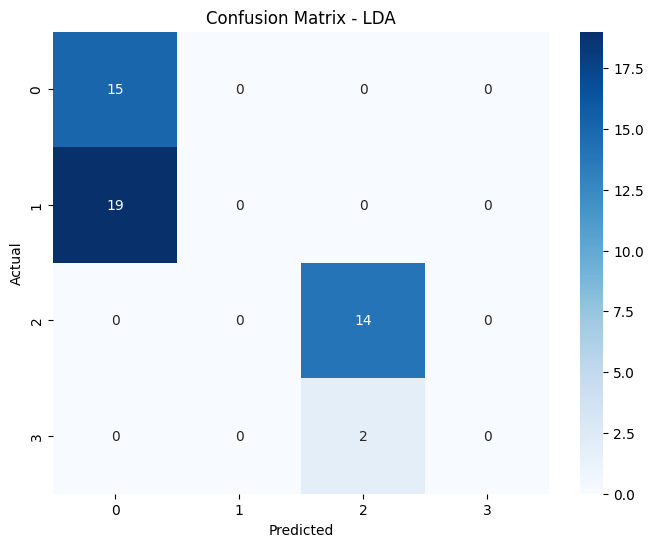

Confusion Matrix for QDA:
[[ 3 12  0  0]
 [ 1 18  0  0]
 [ 0  0 14  0]
 [ 0  0  2  0]]


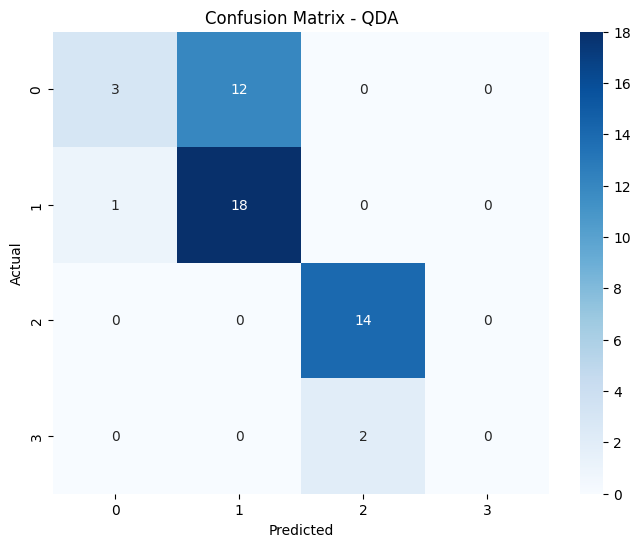

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión para LDA
lda_confusion_matrix = confusion_matrix(y_test, lda_predictions)
print("Confusion Matrix for LDA:")
print(lda_confusion_matrix)

# Graficar la matriz de confusión como un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(lda_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - LDA")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Calcular la matriz de confusión para QDA
qda_confusion_matrix = confusion_matrix(y_test, qda_predictions)
print("Confusion Matrix for QDA:")
print(qda_confusion_matrix)

# Graficar la matriz de confusión como un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(qda_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - QDA")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Naive Bayes**

In [200]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Crear una copia del DataFrame original
data_copy = data.copy()

# Definir las variables predictoras (características) y la variable objetivo
predictors = data.columns.tolist()
predictors.remove('max_dg_sev_during_hospitalization')
target = 'max_dg_sev_during_hospitalization'

# Normalizar las variables predictoras
scaler = StandardScaler()
data_copy[predictors] = scaler.fit_transform(data_copy[predictors])

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data_copy[predictors], data_copy[target], test_size=0.2, random_state=42)

# Aplicar el clasificador Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = gnb.predict(X_test)

# Calcular la precisión de las predicciones
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Gaussian Naive Bayes: ", accuracy)

Accuracy for Gaussian Naive Bayes:  0.56


Confusion Matrix for Naive Bayes:
[[15  0  0  0]
 [18  1  0  0]
 [ 0  0 10  4]
 [ 0  0  0  2]]


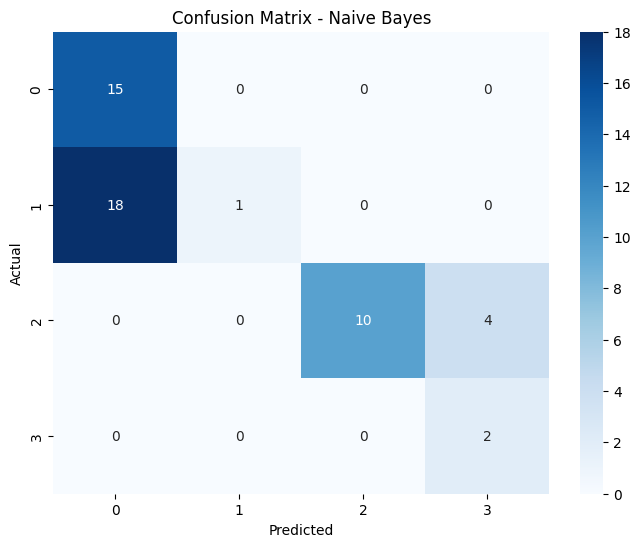

In [201]:
# Realizar predicciones en el conjunto de prueba
nb_predictions = gnb.predict(X_test)

# Calcular la matriz de confusión
nb_confusion_matrix = confusion_matrix(y_test, nb_predictions)
print("Confusion Matrix for Naive Bayes:")
print(nb_confusion_matrix)

# Graficar la matriz de confusión como un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(nb_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**LogisticRegression**

In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Crear una copia del DataFrame original
data_copy = data.copy()

# Definir las variables predictoras (características) y la variable objetivo
predictors = data.columns.tolist()
predictors.remove('max_dg_sev_during_hospitalization')
target = 'max_dg_sev_during_hospitalization'

# Normalizar las variables predictoras
scaler = StandardScaler()
data_copy[predictors] = scaler.fit_transform(data_copy[predictors])

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data_copy[predictors], data_copy[target], test_size=0.2, random_state=42)

# Aplicar la Regresión Logística con penalización
logreg = LogisticRegression(multi_class='multinomial', penalty='l2', solver='sag')
logreg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = logreg.predict(X_test)

# Calcular la precisión de las predicciones
accuracy = accuracy_score(y_test, predictions)
print("Accuracy for Logistic Regression: ", accuracy)

Accuracy for Logistic Regression:  0.72


Confusion Matrix for Logistic Regression:
[[10  5  0  0]
 [ 5 14  0  0]
 [ 0  0 12  2]
 [ 0  0  2  0]]


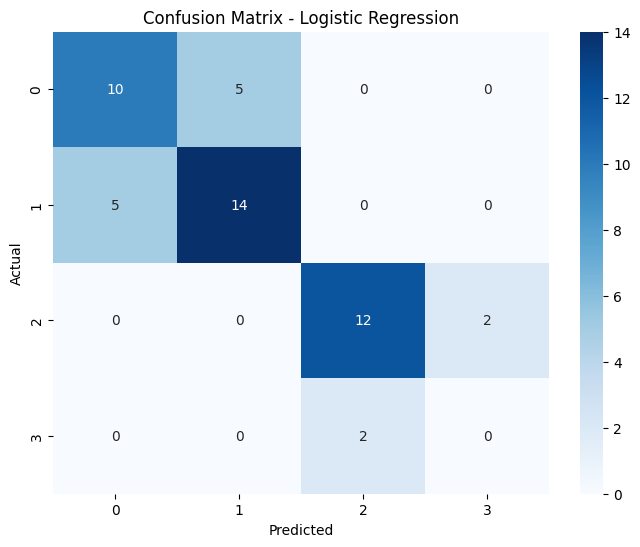

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Realizar predicciones en el conjunto de prueba
predictions = logreg.predict(X_test)

# Calcular la matriz de confusión
confusion_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix)

# Graficar la matriz de confusión como un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**DecisionTreeClassifier**

In [204]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Crear una copia del DataFrame original
data_copy = data.copy()

# Definir las variables predictoras (características) y la variable objetivo
predictors = data.columns.tolist()
predictors.remove('max_dg_sev_during_hospitalization')
target = 'max_dg_sev_during_hospitalization'

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data_copy[predictors], data_copy[target], test_size=0.2, random_state=42)

# Aplicar el Árbol de Decisión
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = dt.predict(X_test)

# Calcular la precisión de las predicciones
accuracy = accuracy_score(y_test, predictions)
print("Accuracy for Decision Tree: ", accuracy)

Accuracy for Decision Tree:  0.78


Confusion Matrix for Decision Tree:
[[11  4  0  0]
 [ 4 15  0  0]
 [ 0  0 12  2]
 [ 0  0  1  1]]


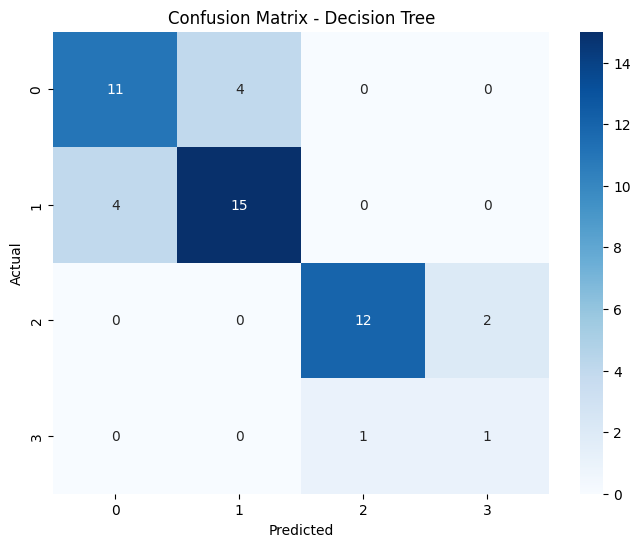

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Realizar predicciones en el conjunto de prueba
predictions = dt.predict(X_test)

# Calcular la matriz de confusión
confusion_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix)

# Graficar la matriz de confusión como un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

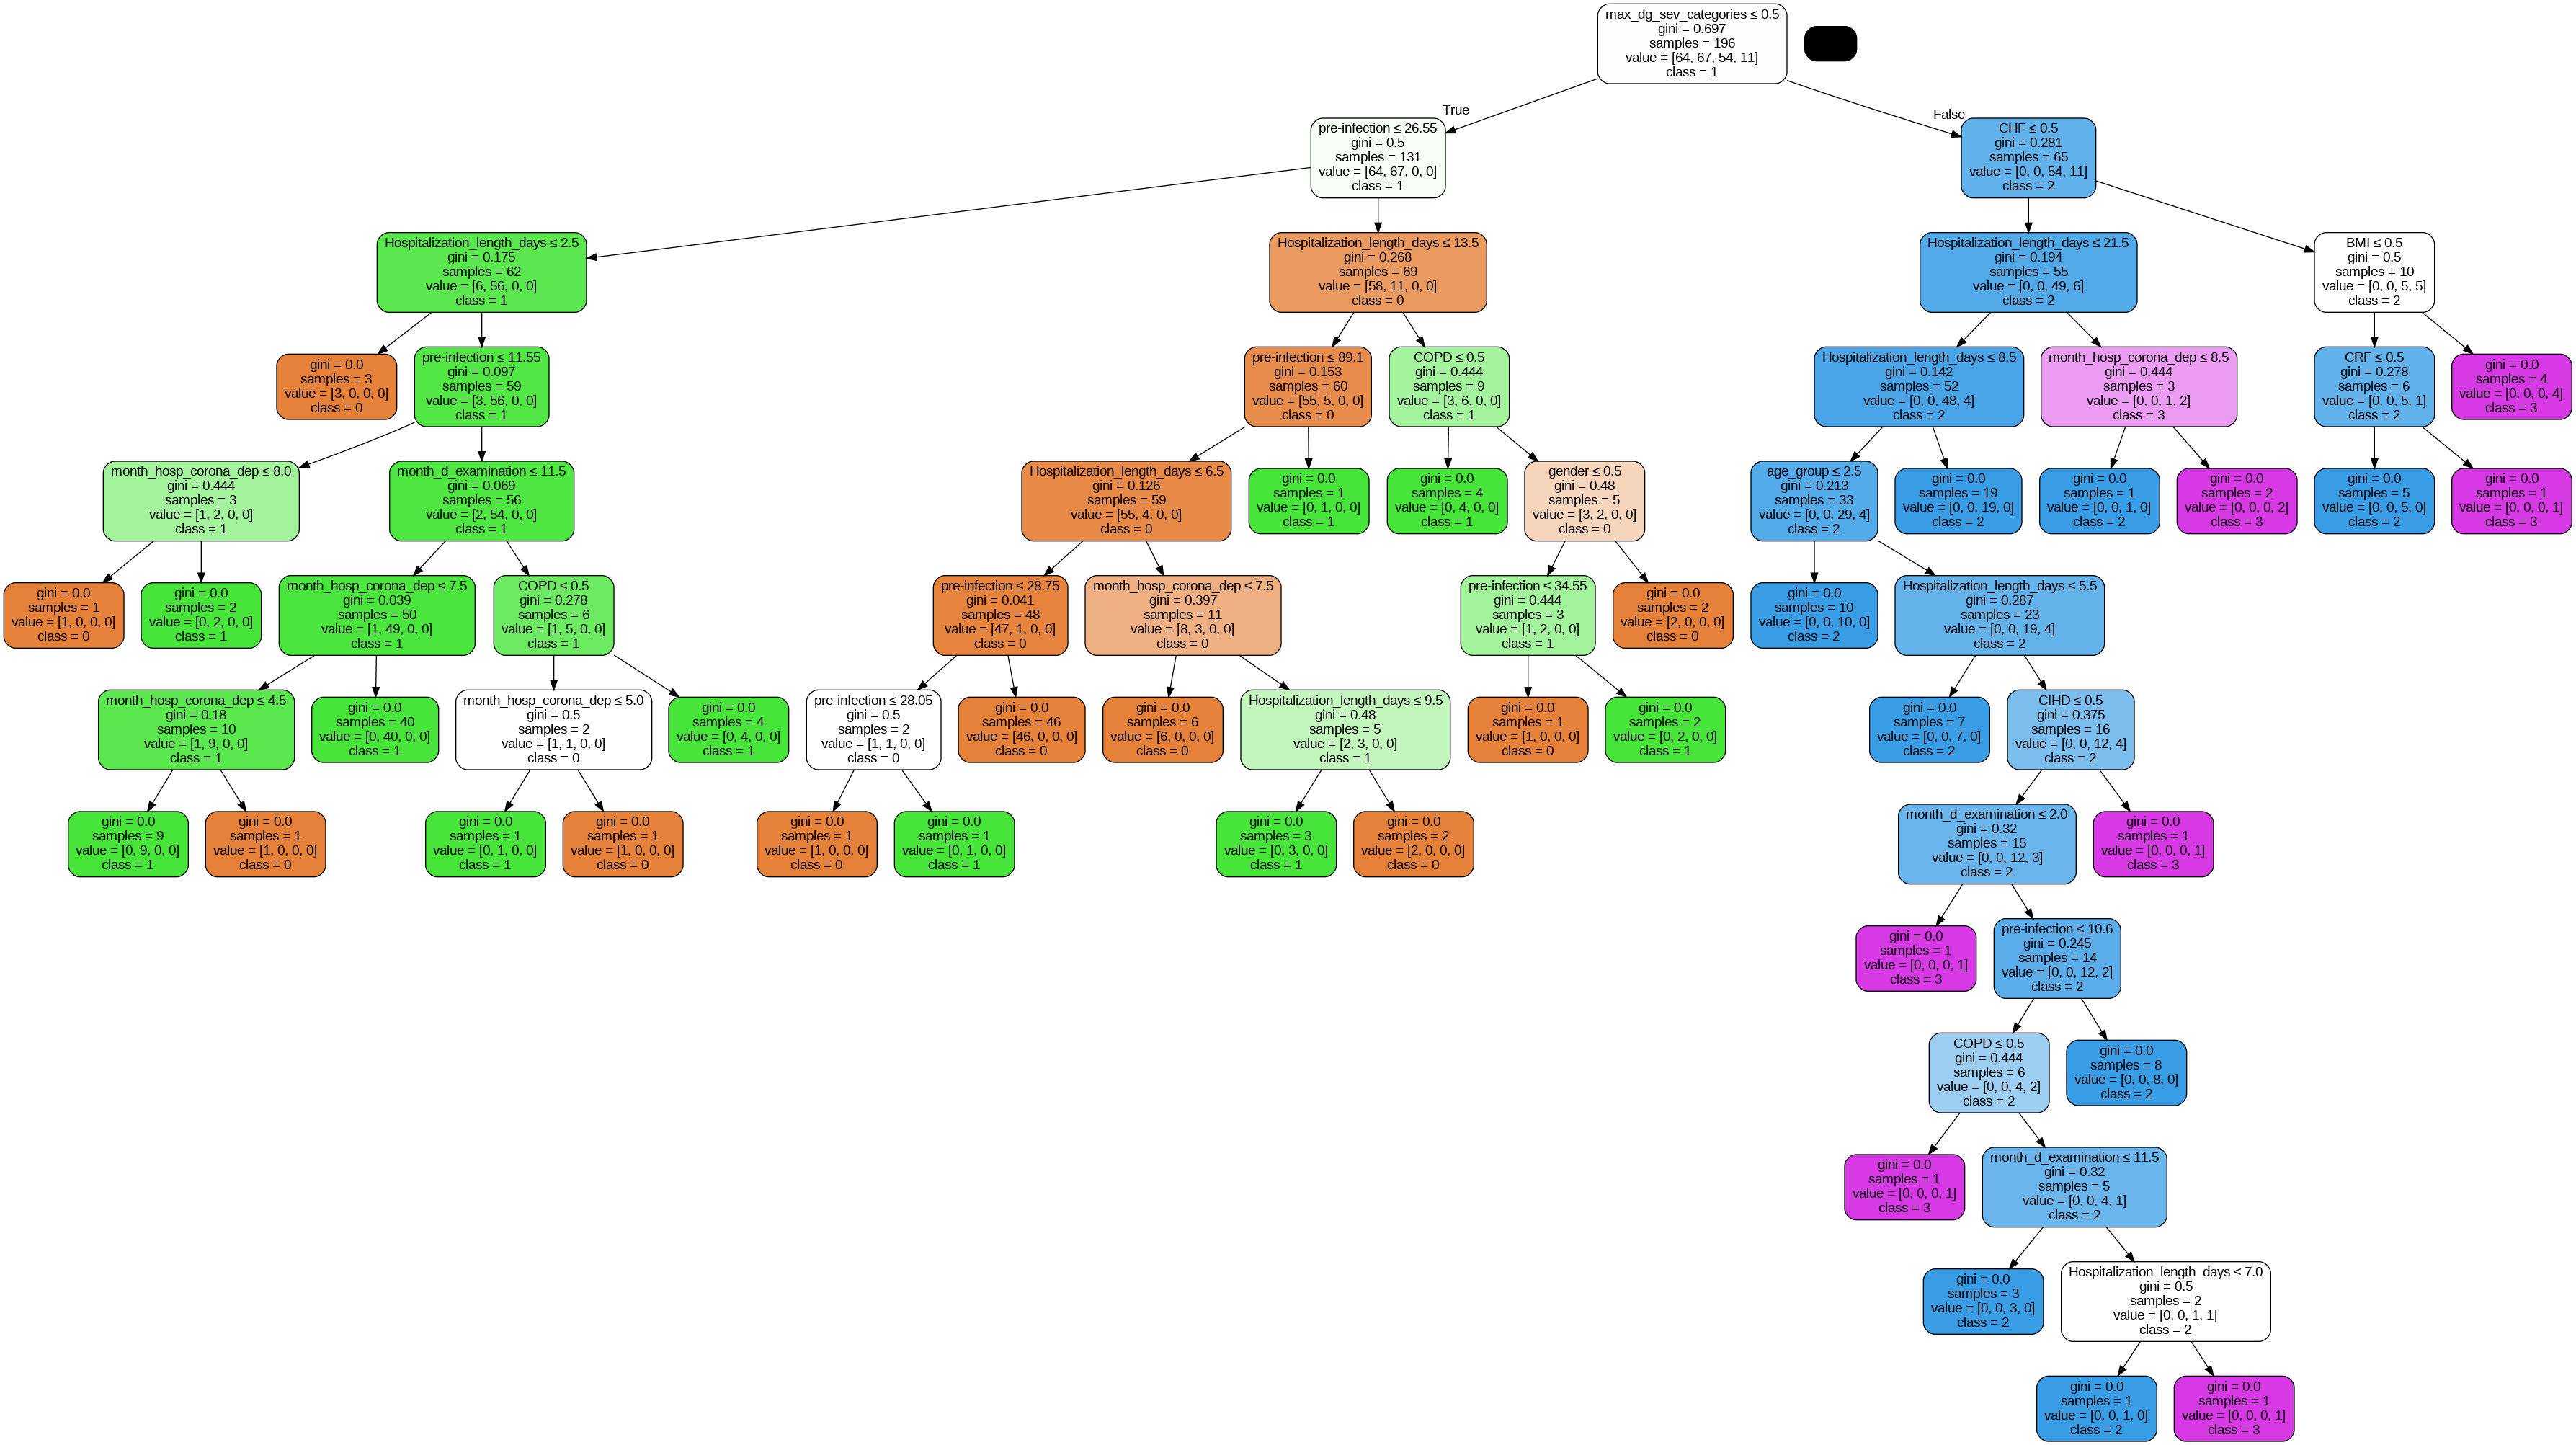

In [206]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Crear el archivo .dot para visualizar el árbol
dot_data = export_graphviz(dt, out_file=None, feature_names=predictors, class_names=['0', '1', '2', '3'],
                           filled=True, rounded=True, special_characters=True)

# Generar el objeto pydotplus desde el archivo .dot
graph = pydotplus.graph_from_dot_data(dot_data)

# Mostrar la imagen del árbol
tree_image = Image(graph.create_png())
display(tree_image)

**RandomForestClassifier**

In [207]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Crear una copia del DataFrame original
data_copy = data.copy()

# Definir las variables predictoras (características) y la variable objetivo
predictors = data.columns.tolist()
predictors.remove('max_dg_sev_during_hospitalization')
target = 'max_dg_sev_during_hospitalization'

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data_copy[predictors], data_copy[target], test_size=0.2, random_state=42)

# Aplicar el Random Forest
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = rf.predict(X_test)

# Calcular la precisión de las predicciones
accuracy = accuracy_score(y_test, predictions)
print("Accuracy for Random Forest: ", accuracy)

Accuracy for Random Forest:  0.82


Confusion Matrix for for Random Forest:
[[ 9  6  0  0]
 [ 2 17  0  0]
 [ 0  0 14  0]
 [ 0  0  1  1]]


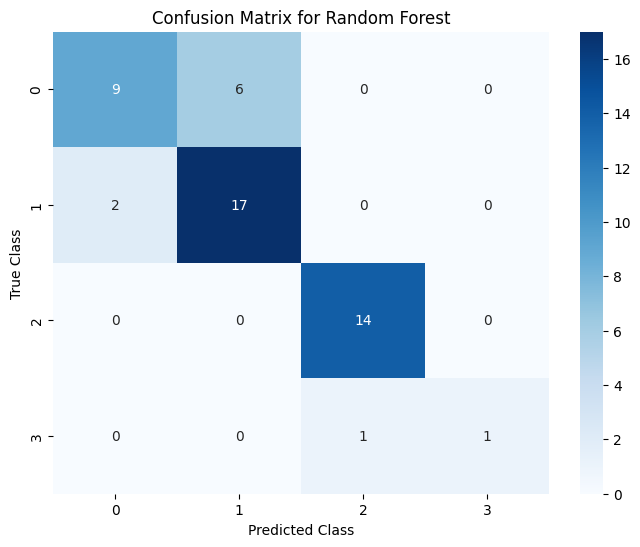

In [208]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Realizar predicciones en el conjunto de prueba
predictions = rf.predict(X_test)

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix for for Random Forest:")
print(confusion_mat)

# Mostrar la matriz de confusión como un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

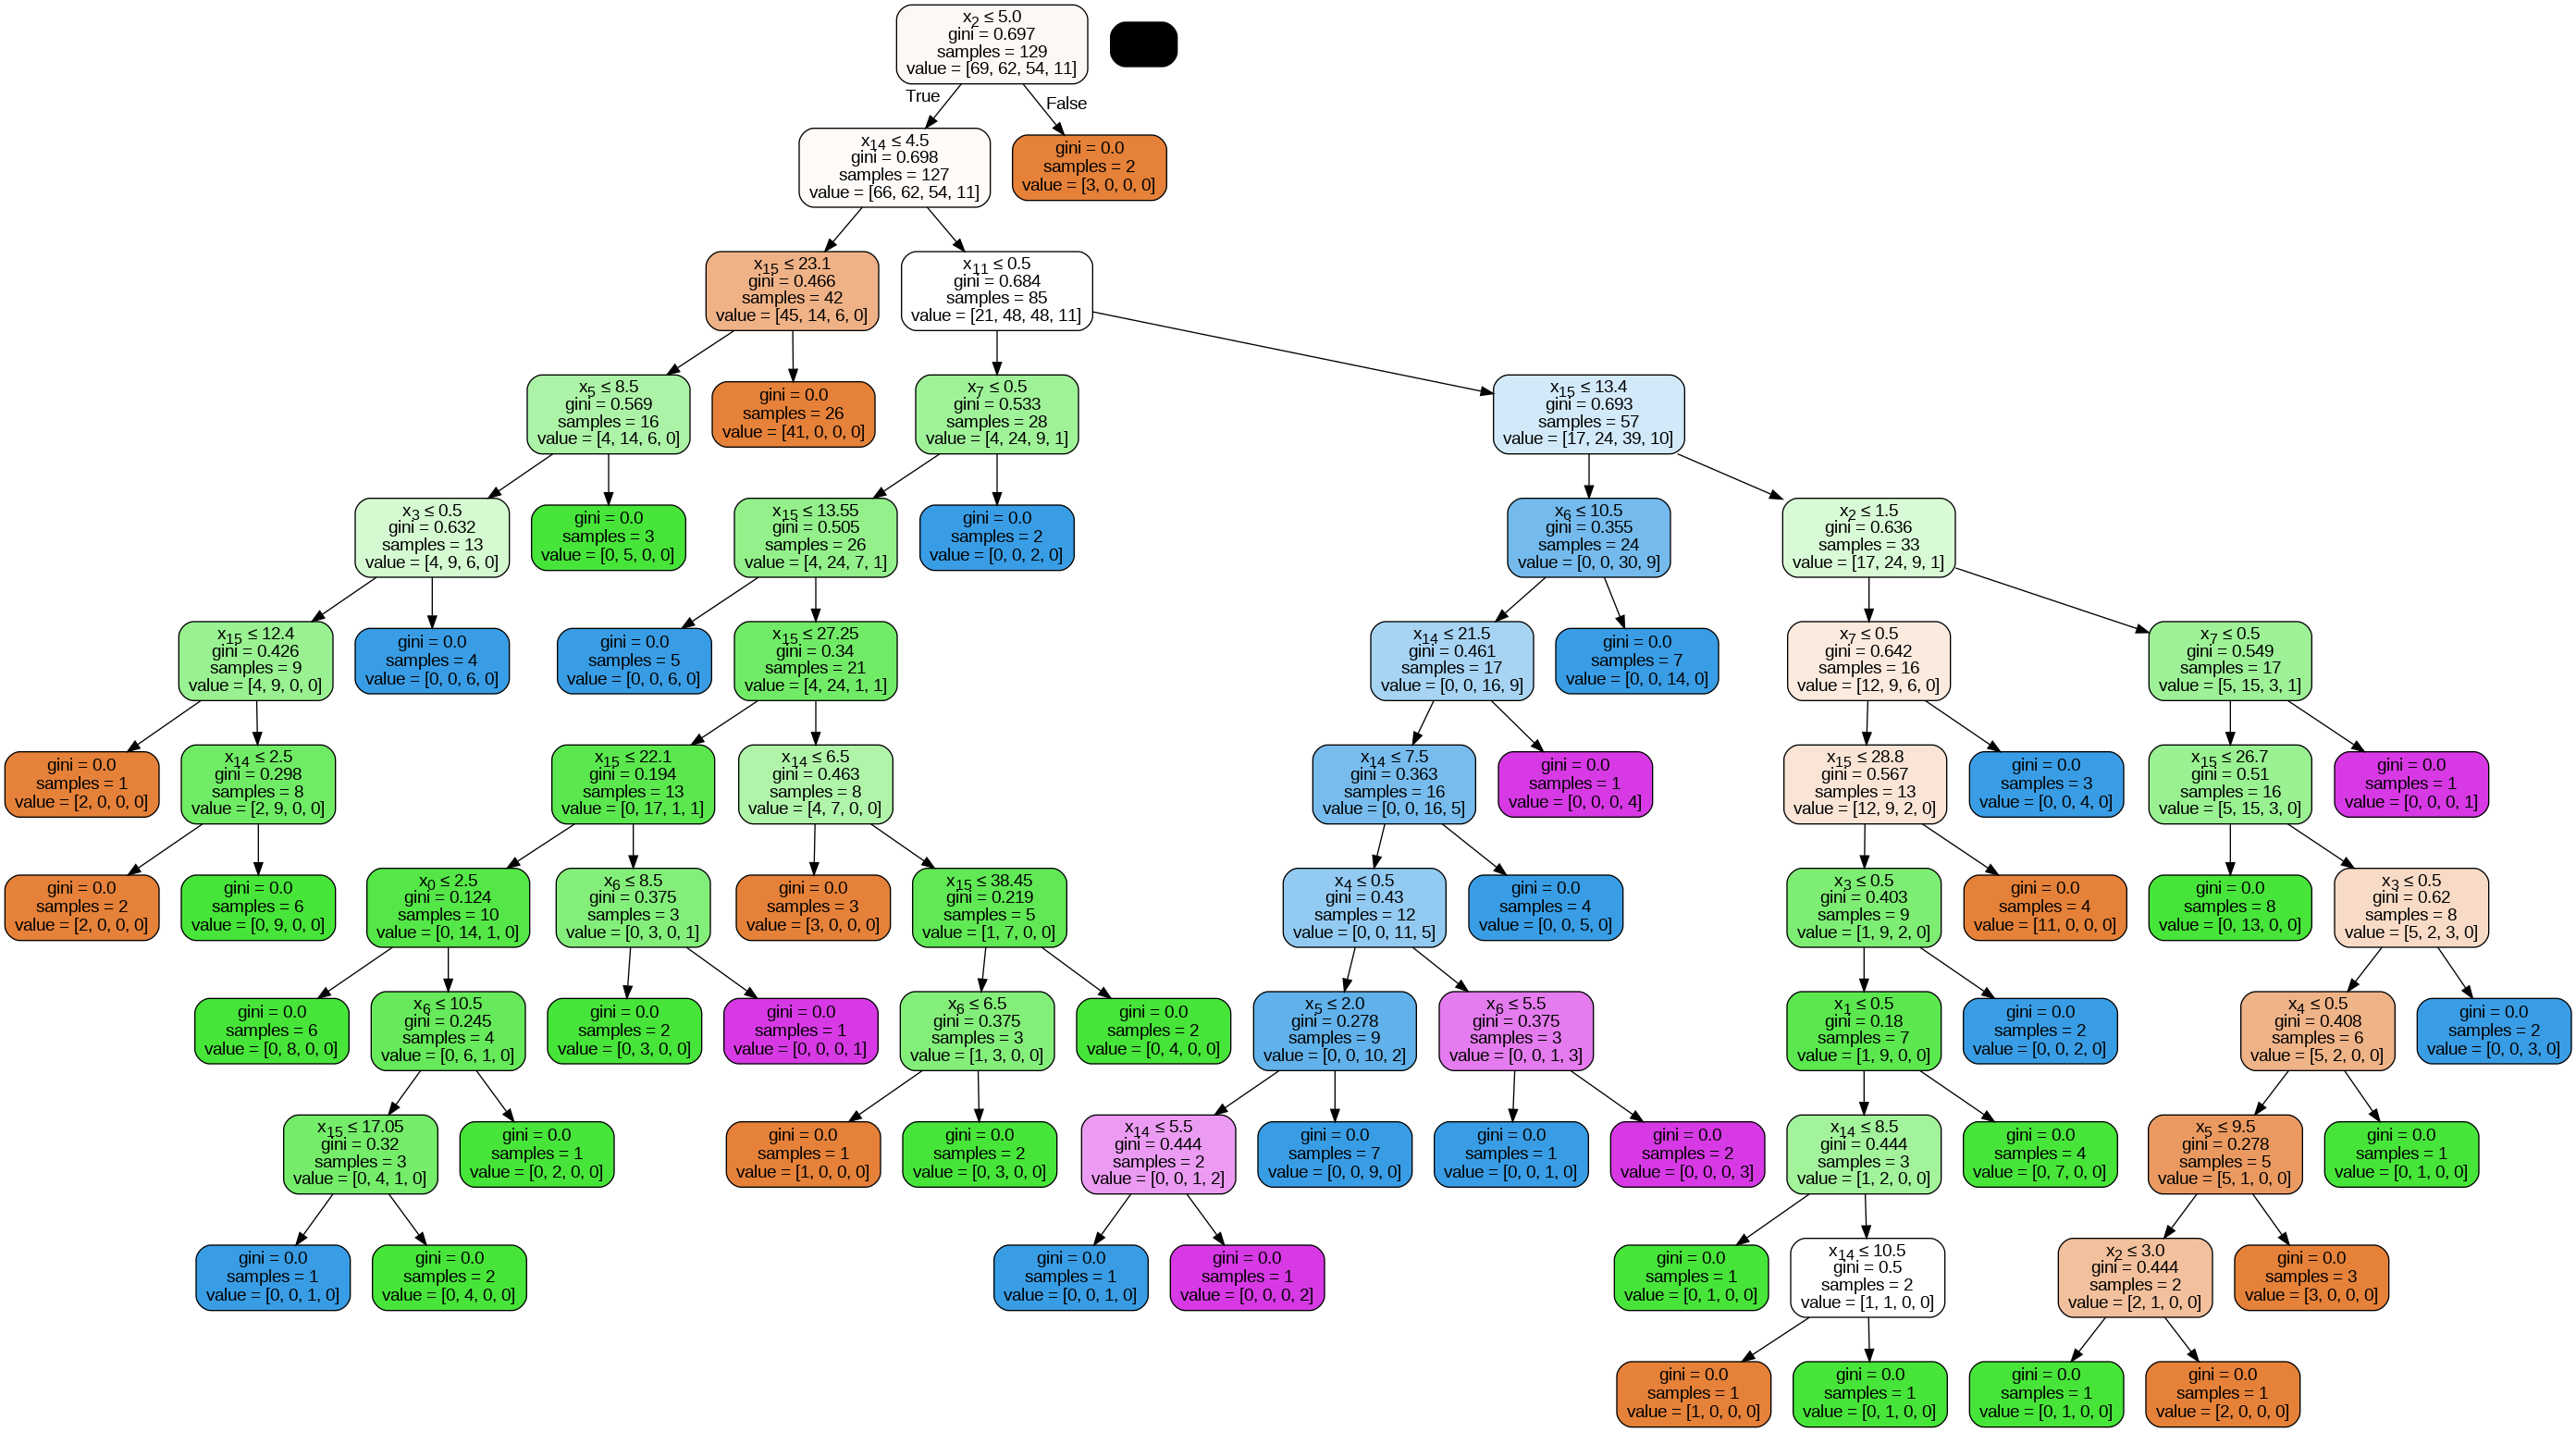

In [209]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Obtener un árbol individual del Random Forest (por ejemplo, el primer árbol)
tree = rf.estimators_[0]

# Crear un archivo .dot para visualizar el árbol
dot_data = export_graphviz(tree, out_file=None, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

# Generar la imagen del árbol
tree_image = Image(graph.create_png())
display(tree_image)


In [210]:
data.head(1)

,age_group,gender,religion,max_dg_sev_during_hospitalization,max_dg_sev_categories,BMI,month_d_examination,month_hosp_corona_dep,death_during_hospitalization,COPD,CHF,CIHD,HTN,CRF,DM,Hospitalization_length_days,pre-infection
0,3,0,1.0,1,0,0,9,10,0,1,0,0,1,0,1,3,17.3


**Prediccion con un ejemplo de todos los modelos**

In [211]:
# Aquí está tu nuevo registro de datos
new_data = pd.DataFrame({
    'age_group': [3],
    'gender': [0],
    'religion': [1.0],
    'max_dg_sev_categories': [0],
    'BMI': [0],  # Asegúrate de que los nombres de las características coincidan exactamente
    'month_d_examination': [9],
    'month_hosp_corona_dep': [10],
    'death_during_hospitalization': [0],
    'COPD': [1],
    'CHF': [0],
    'CIHD': [0],
    'HTN': [1],
    'CRF': [0],  # Asegúrate de que los nombres de las características coincidan exactamente
    'DM': [1],
    'Hospitalization_length_days': [3],
    'pre-infection': [17.3]
})

# Hacer la predicción con LDA y QDA
lda_prediction = lda.predict(new_data)
qda_prediction = qda.predict(new_data)
nb_prediction = gnb.predict(new_data)

# Realizar la predicción con Regresión Logística
# Escalar los datos de new_data de la misma manera que se hizo con los datos de entrenamiento
new_data_scaled = scaler.transform(new_data)

# Crear un DataFrame con los datos escalados y los nombres de las características correspondientes
new_data_scaled = pd.DataFrame(new_data_scaled, columns=data_copy[predictors].columns)

# Realizar la predicción con Regresión Logística
logreg_prediction = logreg.predict(new_data_scaled)

dt_prediction = dt.predict(new_data)
rf_prediction = rf.predict(new_data)

print("LDA prediction: ", lda_prediction)
print("QDA prediction: ", qda_prediction)
print("Naive Bayes prediction: ", nb_prediction)
print("Logistic Regression prediction: ", logreg_prediction)
print("Decision Tree prediction: ", dt_prediction)
print("Random Forest prediction: ", rf_prediction)

LDA prediction:  [0]
QDA prediction:  [1]
Naive Bayes prediction:  [1]
Logistic Regression prediction:  [0]
Decision Tree prediction:  [1]
Random Forest prediction:  [1]


**Enfoque Comite de Maquinas / Ensemble Learning**

In [212]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Crear una copia del DataFrame original
data_copy = data.copy()

# Definir las variables predictoras (características) y la variable objetivo
predictors = data.columns.tolist()
predictors.remove('max_dg_sev_during_hospitalization')
target = 'max_dg_sev_during_hospitalization'

# Normalizar las variables predictoras
scaler = StandardScaler()
data_copy[predictors] = scaler.fit_transform(data_copy[predictors])

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data_copy[predictors], data_copy[target], test_size=0.2, random_state=42)

# Inicializar los modelos individuales
qda = QuadraticDiscriminantAnalysis()
nb = GaussianNB()
rf = RandomForestClassifier()

# Crear el clasificador de votación
ensemble = VotingClassifier(estimators=[('qda', qda), ('nb', nb), ('rf', rf)], voting='hard')

# Entrenar el ensemble
ensemble.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = ensemble.predict(X_test)

# Calcular la precisión de las predicciones
accuracy = accuracy_score(y_test, predictions)
print("Accuracy for Ensemble Learning: ", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning:

Variables are collinear



Accuracy for Ensemble Learning:  0.86


In [213]:
import warnings
from scipy.stats import mode

# Ajustar los modelos de QDA, Naive Bayes y Random Forest
qda.fit(X_train, y_train)
gnb.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Hacer la predicción con el ensemble y desactivar las advertencias
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    ensemble_prediction = mode([qda_prediction, nb_prediction, rf_prediction], axis=0)[0].flatten()

print("Ensemble Learning prediction: ", ensemble_prediction)

Ensemble Learning prediction:  [1]


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning:

Variables are collinear



Estadística de prueba de Kruskal-Wallis: 398.53250827518906
Valor p: 1.1491867298300226e-88


([<matplotlib.axis.XTick at 0x7fce456441f0>,
 [Text(0, 0, 'Não Morte'), Text(1, 0, 'Morte')])

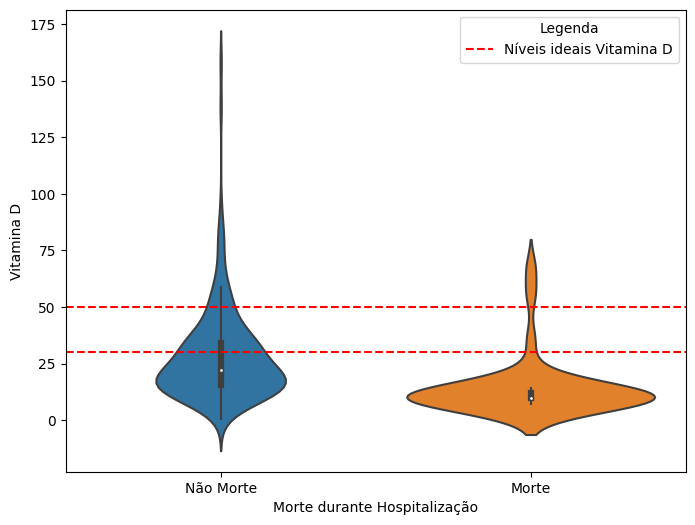

In [214]:
from scipy.stats import kruskal
# Realizar la prueba de Kruskal-Wallis
a=data["death_during_hospitalization"]
b=data["pre-infection"]
statistic, p_value = kruskal(a,b)

# Imprimir los resultados
print("Estadística de prueba de Kruskal-Wallis:", statistic)
print("Valor p:", p_value)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.violinplot(x=a, y=b)

plt.axhline(y=50, color='red', linestyle='--', label = "Níveis ideais Vitamina D")
plt.axhline(y=30, color='red', linestyle='--')
plt.legend(title = "Legenda")
plt.xlabel("Morte durante Hospitalização")
plt.ylabel("Vitamina D")
plt.xticks([0, 1], ['Não Morte', 'Morte'])

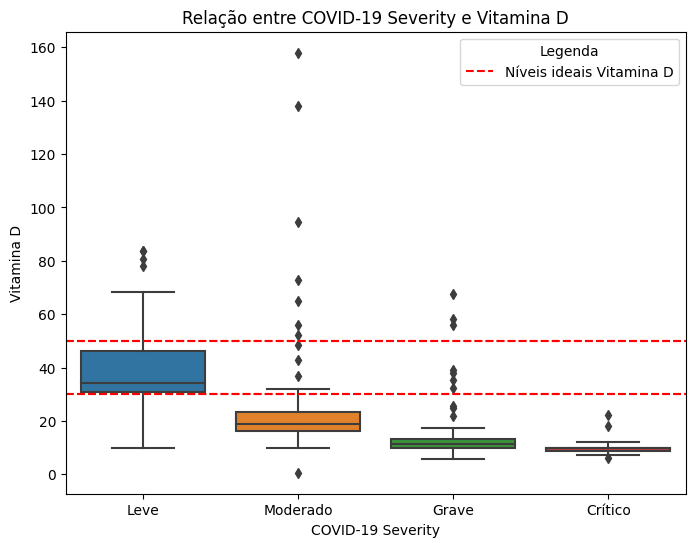

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

a=data["max_dg_sev_during_hospitalization"]
b=data["pre-infection"]

plt.figure(figsize=(8, 6))
sns.boxplot(x=a, y=b)
plt.axhline(y=50, color='red', linestyle='--')
plt.axhline(y=30, color='red', linestyle='--')

plt.xlabel("COVID-19 Severity")
plt.ylabel("Vitamina D")
plt.title("Relação entre COVID-19 Severity e Vitamina D")
plt.axhline(y=50, color='red', linestyle='--', label = "Níveis ideais Vitamina D")
plt.axhline(y=30, color='red', linestyle='--')
plt.legend(title = "Legenda")
plt.xticks([0, 1, 2, 3], ['Leve', 'Moderado', 'Grave', 'Crítico'])
plt.show()

**PCA de 2 componentes Despues Clustering**

Componentes principales:
        PC1       PC2
0  0.754486  1.123055
1  1.973425  1.311087
2  0.285279  1.009514
3  0.335503  1.445913
4  0.365234  0.981066
Varianza explicada por cada componente:
[0.24115768 0.0982363 ]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

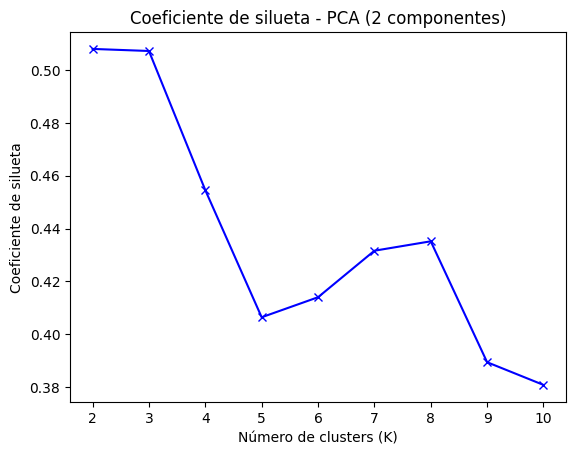

In [216]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Crear una copia del DataFrame original
data_copy = data.copy()

# Definir las variables predictoras (características)
predictors = data.columns.tolist()
predictors.remove('max_dg_sev_during_hospitalization')

# Normalizar las variables predictoras
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_copy[predictors])

# Realizar PCA
pca = PCA(n_components=2)  # Especifica el número de componentes principales deseado
principal_components = pca.fit_transform(data_scaled)

# Crear un nuevo DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Agregar la variable objetivo al DataFrame resultante si se desea visualizar
# pca_df['target'] = data_copy['max_dg_sev_during_hospitalization']

# Imprimir los componentes principales y sus varianzas explicadas
print("Componentes principales:")
print(pca_df.head())

print("Varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)

import plotly.graph_objects as go

# Crear la figura
fig = go.Figure(data=go.Scatter(x=pca_df['PC1'], y=pca_df['PC2'], mode='markers'))

# Configurar el diseño de la figura
fig.update_layout(xaxis_title='PC1',
                  yaxis_title='PC2',
                  title='Gráfico de dispersión de los componentes principales')

# Mostrar la figura
fig.show()

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Rango de valores de K a probar
k_values = range(2, 11)

# Lista para almacenar los valores del coeficiente de silueta
silhouette_scores = []

# Realizar clustering con diferentes valores de K en base a PCA de 2 componentes
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df[['PC1', 'PC2']])
    labels = kmeans.labels_
    score = silhouette_score(pca_df[['PC1', 'PC2']], labels)
    silhouette_scores.append(score)

# Graficar el coeficiente de silueta
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Coeficiente de silueta')
plt.title('Coeficiente de silueta - PCA (2 componentes)')
plt.show()

In [217]:
variable_names = data.columns.tolist()
component_names = ['PC1', 'PC2']  # Nombres de los componentes principales

for component_num, component in enumerate(pca.components_):
    component_loadings = zip(variable_names, component)
    sorted_loadings = sorted(component_loadings, key=lambda x: abs(x[1]), reverse=True)

    print(f"Componente Principal {component_names[component_num]}:")
    for variable, loading in sorted_loadings:
        print(f"{variable}: {loading}")

Componente Principal PC1:
CIHD: 0.4149514355740852
death_during_hospitalization: 0.4094287115971986
age_group: 0.38194645524499254
max_dg_sev_during_hospitalization: 0.30356807375312933
CRF: 0.29523757711224063
month_hosp_corona_dep: 0.28573763141495684
HTN: 0.24516935639224294
CHF: 0.23001932467147912
COPD: 0.22129315604867075
Hospitalization_length_days: -0.192089125232685
DM: 0.1290690370537559
gender: 0.12352594082903702
max_dg_sev_categories: 0.10092678085896946
month_d_examination: -0.09639066314575613
religion: -0.05485556190106357
BMI: 0.0067651414309105595
Componente Principal PC2:
Hospitalization_length_days: 0.45083178350136127
DM: 0.37638538190039156
month_hosp_corona_dep: -0.37104130419204706
max_dg_sev_during_hospitalization: -0.33931573340901094
month_d_examination: 0.32495075614776436
CIHD: 0.2977450067671265
death_during_hospitalization: 0.2948223190127333
CRF: 0.20168084849483042
gender: -0.17789607885004727
CHF: -0.14221387277808747
max_dg_sev_categories: 0.106474921

In [218]:
from sklearn.cluster import KMeans

# Realizar clustering con PCA de 2 componentes y 9 clusters
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(pca_df[['PC1', 'PC2']])
labels = kmeans.labels_

# Agregar las etiquetas de cluster al DataFrame pca_df
pca_df['cluster'] = labels

# Imprimir los resultados
print(pca_df.head())

import plotly.graph_objects as go

# Crear una figura scatter 2D
fig = go.Figure()

for cluster_label in range(9):
    cluster_data = pca_df[pca_df['cluster'] == cluster_label]
    fig.add_trace(go.Scatter(
        x=cluster_data['PC1'],
        y=cluster_data['PC2'],
        mode='markers',
        name=f'Cluster {cluster_label}',
        marker=dict(color=cluster_label)
    ))

fig.update_layout(title='Clustering con PCA de 2 componentes',
                  xaxis=dict(title='PC1'),
                  yaxis=dict(title='PC2'),
                  legend=dict(title='Clusters'))
fig.show()

        PC1       PC2  cluster
0  0.754486  1.123055        4
1  1.973425  1.311087        0
2  0.285279  1.009514        4
3  0.335503  1.445913        4
4  0.365234  0.981066        4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



**PCA de 3 componentes Despues Clustering**

Componentes principales:
        PC1       PC2       PC3
0  0.754486  1.123055 -0.662152
1  1.973425  1.311087 -0.441703
2  0.285279  1.009514 -0.668147
3  0.335503  1.445913 -0.380710
4  0.365234  0.981066 -0.208299
Varianza explicada por cada componente:
[0.24115768 0.0982363  0.08100334]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

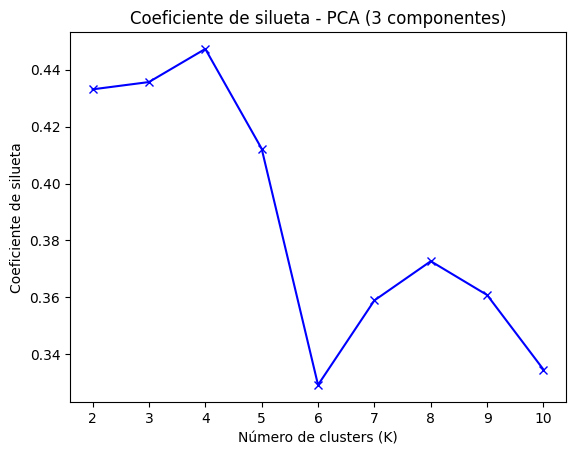

In [219]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Crear una copia del DataFrame original
data_copy = data.copy()

# Definir las variables predictoras (características)
predictors = data.columns.tolist()
predictors.remove('max_dg_sev_during_hospitalization')

# Normalizar las variables predictoras
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_copy[predictors])

# Realizar PCA
pca = PCA(n_components=3)  # Especifica el número de componentes principales deseado
principal_components = pca.fit_transform(data_scaled)

# Crear un nuevo DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Agregar la variable objetivo al DataFrame resultante si se desea visualizar
# pca_df['target'] = data_copy['max_dg_sev_during_hospitalization']

# Imprimir los componentes principales y sus varianzas explicadas
print("Componentes principales:")
print(pca_df.head())

print("Varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)

import plotly.graph_objects as go

# Crear la figura
fig = go.Figure(data=[go.Scatter3d(x=pca_df['PC1'], y=pca_df['PC2'], z=pca_df['PC3'],
                                   mode='markers', marker=dict(size=5))])

# Configurar el diseño de la figura
fig.update_layout(scene=dict(xaxis_title='PC1',
                             yaxis_title='PC2',
                             zaxis_title='PC3'),
                  title='Gráfico de dispersión de los componentes principales en 3D')

# Mostrar la figura
fig.show()

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Rango de valores de K a probar
k_values = range(2, 11)

# Lista para almacenar los valores del coeficiente de silueta
silhouette_scores = []

# Realizar clustering con diferentes valores de K en base a PCA de 3 componentes
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df[['PC1', 'PC2', 'PC3']])
    labels = kmeans.labels_
    score = silhouette_score(pca_df[['PC1', 'PC2', 'PC3']], labels)
    silhouette_scores.append(score)

# Graficar el coeficiente de silueta
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Coeficiente de silueta')
plt.title('Coeficiente de silueta - PCA (3 componentes)')
plt.show()

In [220]:
variable_names = data.columns.tolist()
component_names = ['PC1', 'PC2', 'PC3']  # Nombres de los componentes principales

for component_num, component in enumerate(pca.components_):
    component_loadings = zip(variable_names, component)
    sorted_loadings = sorted(component_loadings, key=lambda x: abs(x[1]), reverse=True)

    print(f"Componente Principal {component_names[component_num]}:")
    for variable, loading in sorted_loadings:
        print(f"{variable}: {loading}")

Componente Principal PC1:
CIHD: 0.4149514355740852
death_during_hospitalization: 0.4094287115971986
age_group: 0.38194645524499254
max_dg_sev_during_hospitalization: 0.30356807375312933
CRF: 0.29523757711224063
month_hosp_corona_dep: 0.28573763141495684
HTN: 0.24516935639224294
CHF: 0.23001932467147912
COPD: 0.22129315604867075
Hospitalization_length_days: -0.192089125232685
DM: 0.1290690370537559
gender: 0.12352594082903702
max_dg_sev_categories: 0.10092678085896946
month_d_examination: -0.09639066314575613
religion: -0.05485556190106357
BMI: 0.0067651414309105595
Componente Principal PC2:
Hospitalization_length_days: 0.45083178350136127
DM: 0.37638538190039156
month_hosp_corona_dep: -0.37104130419204706
max_dg_sev_during_hospitalization: -0.33931573340901094
month_d_examination: 0.32495075614776436
CIHD: 0.2977450067671265
death_during_hospitalization: 0.2948223190127333
CRF: 0.20168084849483042
gender: -0.17789607885004727
CHF: -0.14221387277808747
max_dg_sev_categories: 0.106474921

In [221]:
from sklearn.cluster import KMeans

# Realizar clustering con PCA de 3 componentes y 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(pca_df[['PC1', 'PC2', 'PC3']])
labels = kmeans.labels_

# Agregar las etiquetas de cluster al DataFrame pca_df
pca_df['cluster'] = labels

# Imprimir los resultados
print(pca_df.head())

import plotly.graph_objects as go

# Crear una figura scatter 3D
fig = go.Figure()

for cluster_label in range(6):
    cluster_data = pca_df[pca_df['cluster'] == cluster_label]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['PC1'],
        y=cluster_data['PC2'],
        z=cluster_data['PC3'],
        mode='markers',
        name=f'Cluster {cluster_label}',
        marker=dict(color=cluster_label)
    ))

fig.update_layout(title='Clustering con PCA de 3 componentes',
                  scene=dict(xaxis=dict(title='PC1'),
                             yaxis=dict(title='PC2'),
                             zaxis=dict(title='PC3')),
                  legend=dict(title='Clusters'))
fig.show()

        PC1       PC2       PC3  cluster
0  0.754486  1.123055 -0.662152        2
1  1.973425  1.311087 -0.441703        5
2  0.285279  1.009514 -0.668147        2
3  0.335503  1.445913 -0.380710        2
4  0.365234  0.981066 -0.208299        2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

